# Group 5 Project

### Business Understanding

What determines a house price?

Our project aims to provide a consultation for real estate angencies that help homeowners sell homes. We will develop a pricing algorithm to help set a price for a home by predicting home prices. 

First, our pricing model will show the relationships between the attributes of a house and its price. Then, we address the key attributes that determine the house price. 


### Data Understanding

This project uses the King County House Sales dataset, which contains 21597 home sales records in 2014-2015, including attributes of houses as well as their prices. 


### Loading the Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api #as smf
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
import sklearn.preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("data/kc_house_data.csv", index_col=0)

In [6]:
data.waterfront.fillna(value=0, inplace = True)
data.yr_renovated.fillna(value=0, inplace = True)
data.view.fillna(value=0, inplace = True)

In [8]:
data = data.drop(data[data['bedrooms']==33].index).copy()

In [9]:
price_plot = data.loc[data['price']<3500000]

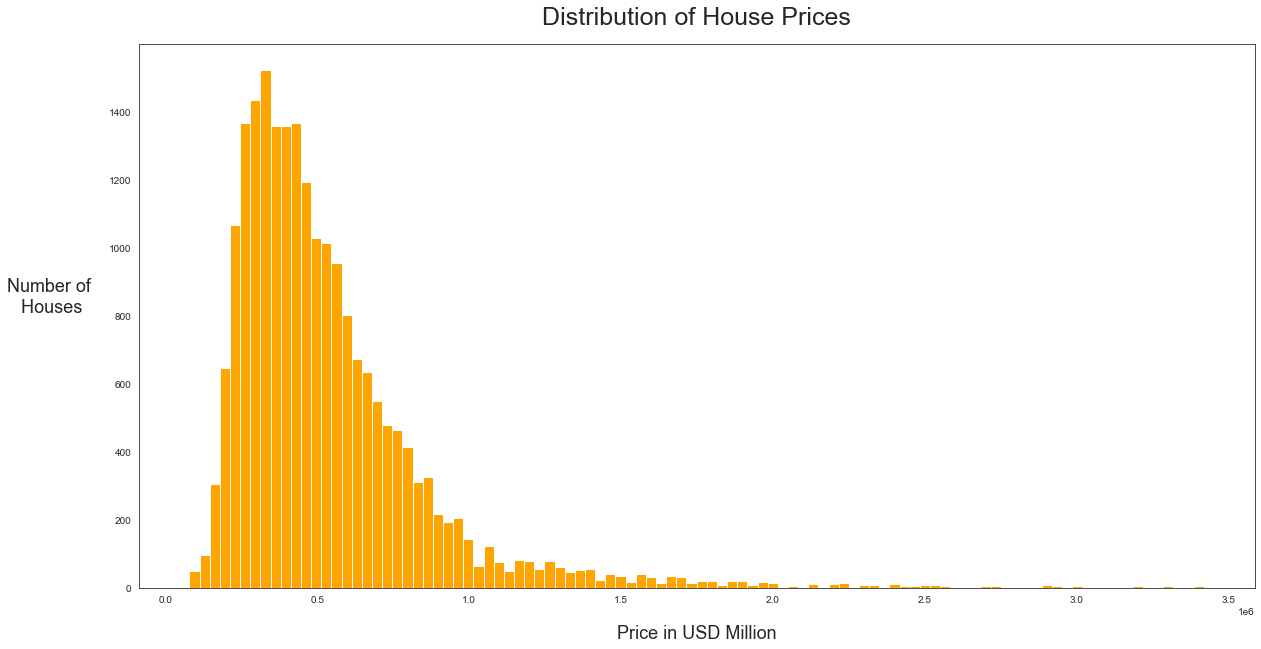

In [10]:
price_plot = data.loc[data['price']<3500000]
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(price_plot['price'], bins=100, color='orange')

ax.set_xlabel("Price in USD Million", fontsize=18, labelpad=20)
ax.set_ylabel("Number of\n Houses", fontsize=18, labelpad=60, rotation=0)
ax.set_title("Distribution of House Prices", fontsize=25, pad=20);

In [11]:
X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
9834201100,12/22/2014,4,2.00,1440,4855,2.0,0.0,0.0,4,7,1440,0.0,1972,0.0,98144,47.5717,-122.287,1300,4080
7795810110,5/12/2015,3,1.75,1430,9857,1.0,0.0,2.0,4,7,1140,290.0,1980,0.0,98045,47.4964,-121.771,1310,9880
1853081250,12/29/2014,4,2.75,3120,5000,2.0,0.0,0.0,3,9,3120,0.0,2010,0.0,98074,47.5940,-122.062,3200,5000
2558630350,3/21/2015,4,2.50,2060,6958,1.0,0.0,0.0,3,7,1220,840.0,1974,0.0,98034,47.7251,-122.168,1760,7350
3362401000,7/1/2014,3,2.00,2500,4080,1.5,0.0,0.0,5,7,1680,820.0,1922,0.0,98103,47.6813,-122.346,1550,3060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853230570,9/15/2014,3,2.50,2230,5800,2.0,0.0,0.0,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
1931300412,4/16/2015,3,2.25,1190,1200,3.0,0.0,0.0,3,8,1190,0.0,2008,0.0,98103,47.6542,-122.346,1180,1224
8658300480,7/21/2014,4,1.50,1530,9000,1.0,0.0,0.0,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500



## 1. Interpret a Correlation Heatmap to Build a Baseline Model

Start modeling by choosing the feature that is most correlated with our target, and build and evaluate a linear regression model with just that feature.


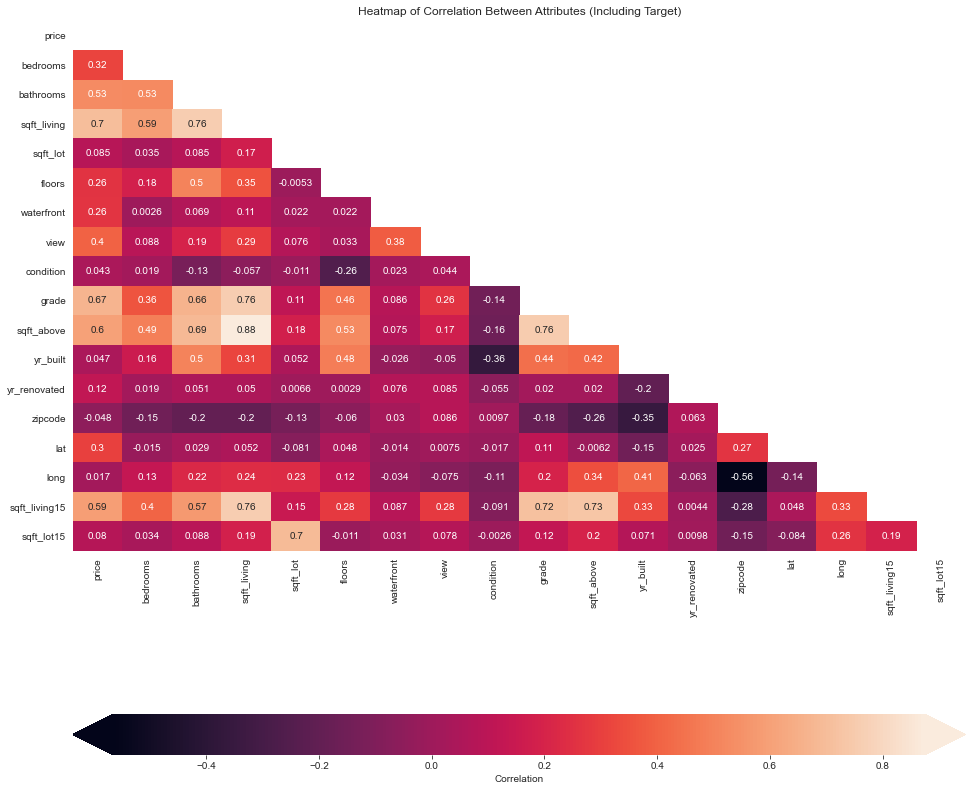

In [12]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. 
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the plot above, 'sqft_living' is most strongly correlated with the target (`price`).

In [13]:
most_correlated_feature1 = 'sqft_living'
most_correlated_feature2 = 'grade'

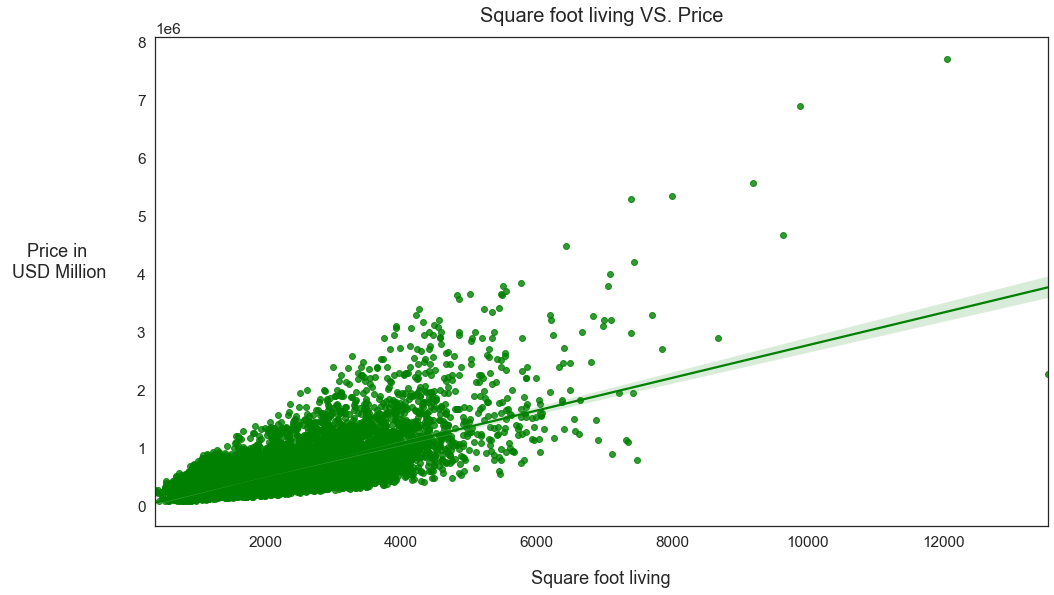

In [50]:
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)

sns.regplot( 
        x=X_train['sqft_living'],
        y=y_train
        ci=99,
        color='green',
    )

ax.set_xlabel("Square foot living", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Square foot living VS. Price", fontsize=20, pad=15);

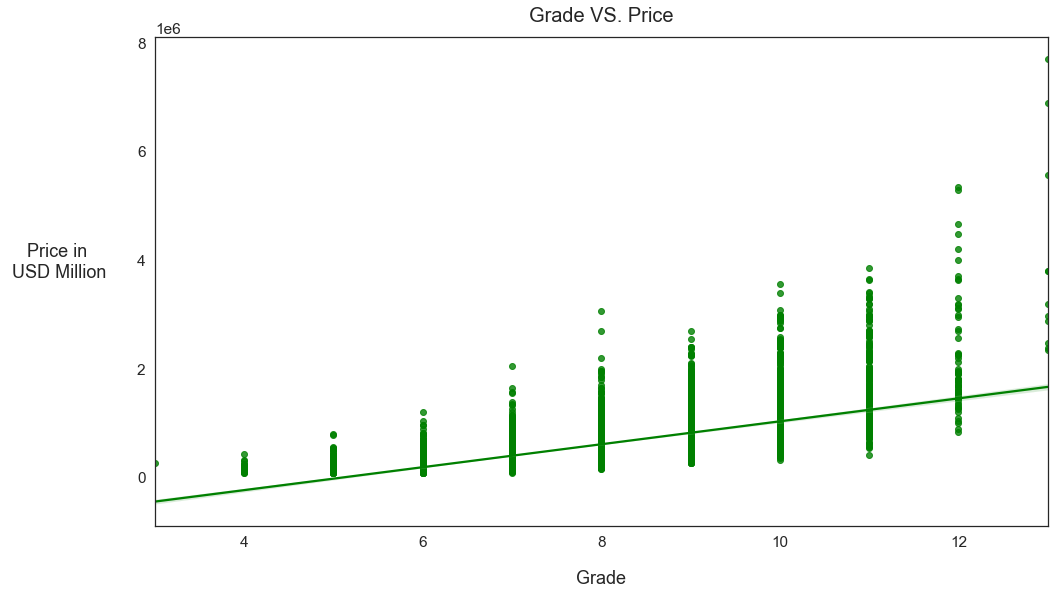

In [15]:
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)

sns.regplot( 
        x=X_train[most_correlated_feature2],
        y=y_train,
        ci=99,
        color='green'
    )

ax.set_xlabel("Grade", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Grade VS. Price", fontsize=20, pad=15);

### Process additional transformation for our baseline model.

In [16]:
#seperating two types of predictors 
categorical = ['bedrooms','bathrooms','zipcode', 'floors', 'waterfront', 'condition', 'grade']
con = ['sqft_living','sqft_lot']

In [17]:
#creating dummie variables for categorical data
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(X_train[categorical])
dummies_encoded_train = ohe.transform(X_train[categorical])
dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns=ohe.get_feature_names(categorical))


### Building a Baseline Model

Now, we'll build a linear regression model using just that feature, which will serve as our baseline model.


In [30]:
baseline_model = LinearRegression()

###Then we evaluate the model using `cross_validate` and `ShuffleSplit`, which essentially means that we perform 3 separate train-test splits within our `X_train` and `y_train`, then we find both the train and the test scores for each.

In [31]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature1]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Train score:      0.487875389086073
Validation score: 0.501687665023275


Interpret these scores. below. What are we measuring? What can we learn from this?


## 2. Build the Second Model with Additional Feature (Grade)

We will add in additional feature of the training data, and compare that model's performance to the performance of the baseline model.



### Building and Evaluating the Second Model


In [36]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6448808892114626
Validation score: 0.6534121602878943

Baseline Model
Train score:      0.487875389086073
Validation score: 0.501687665023275


Current model's validation score is higher than the baseline model.


### Investigating Multicollinearity


In [37]:
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3178.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:20:50   Log-Likelihood:            -2.3694e+05
No. Observations:               17276   AIC:                         4.739e+05
Df Residuals:                   17265   BIC:                         4.740e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.338e+06   3.42e+06      0.976      0.329   -3.37e+06       1e+07
bedrooms    -4.623e+04   2384.856    -19.386      0.000   -5.09e+04   -4.16e+04
bathrooms    5.318e+04   3885.953     13.685      0.000    4.56e+04    6.08e+04
sqft_living   178.5524      3.737     47.779      0.000     171.227     185.877
sqft_lot       -0.2664      0.041     -6.444      0.000      -0.347      -0.185
floors       1.941e+04   3896.545      4.981      0.000    1.18e+04     2.7e+04
waterfront   7.251e+05   2.04e+04     35.597      0.000    6.85e+05    7.65e+05
condition    2.085e+04   2792.216      7.468      0.000    1.54e+04    2.63e+04
grade        1.313e+05   2417.894     54.316      0.000    1.27e+05    1.36e+05
yr_built    -3855.3174     79.227    -48.662      0.000   -4010.610   -3700.025
zipcode        34.3282     34.284      1.001      0.317     -32.873     101.529
==============================================================================
Omnibus:                    12801.063   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           820479.468
Skew:                           2.977   Prob(JB):                         0.00
Kurtosis:                      36.232   Cond. No.                     2.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## 3. Build and Evaluate a Final Predictive Model

Using the best features selected in the previous step, create a final model, fit it on all rows of the training dataset, and evaluate it on all rows of the test dataset in terms of both r-squared and RMSE.



### Selecting Features


In [40]:
best_features = ['sqft_living','bedrooms', 'waterfront', 'grade', 'yr_built']

In [41]:
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In [42]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_train_final, y_train)

0.6402026676114349

In [43]:
mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

218871.47327158123

The price in the model is off by $218871.


## 4. Interpret the Final Model

Determine what, if any, understanding of the underlying relationship between variables can be determined with this model. This means you will need to interpret the model coefficients as well as checking whether the assumptions of linear regression have been met.


In [44]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living       198.265824
bedrooms       -37321.104783
waterfront     734172.269489
grade          137837.495363
yr_built        -3547.323779
Name: Coefficients, dtype: float64

Intercept: 6185401.270327588



### Investigating Linearity

Check whether the linearity assumption holds.


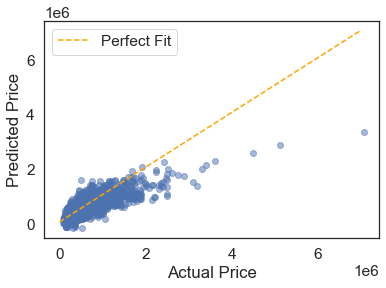

In [45]:
preds = final_model.predict(X_test_final)

sns.set_style("white")
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();


### Investigating Normality

Check whether the normality assumption holds for our model.


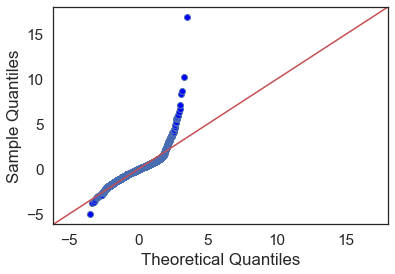

In [46]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);


### Investigating Multicollinearity (Independence Assumption)


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_living     20.319702
bedrooms        23.739955
waterfront       1.024867
grade          114.891056
yr_built        86.570835
Name: Variance Inflation Factor, dtype: float64


### Investigating Homoscedasticity

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.


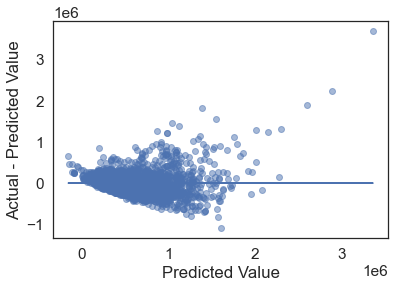

In [48]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");


# Conclusion
